## Understanding Casual and Annual Rider Behavior at Cyclistic Bike-Share
A Comprehensive Analysis of Usage Patterns to Drive Membership Growth

### Company Background:
Cyclistic is a Chicago-based bike‐share company offering both subscription plans and pay-as-you-go rentals. Founded in 2016, Cyclistic today operates a fleet of 5,824 GPS-equipped bicycles across 692 stations throughout the city, making it easy for commuters and visitors alike to explore Chicago on two wheels. Cyclistic sets itself apart by also offering reclining bikes, hand
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike.

### Data Contex:
I will be using the publicly available bike-share trip data provided by Motivate International Inc. for analysis and research purposes. While this dataset is open for exploration, it does not permit the use or disclosure of any riders’ personally identifiable information.

### Problem Statement:
Cyclistic seeks to convert a larger share of its casual riders into annual members by leveraging insights from historical trip data. Specifically, I need to:
* Quantify and compare ride frequency, trip duration, time-of-day, day-of-week, and geographic patterns between casual and annual riders.
* Identify key motivators and barriers that influence casual riders’ decisions to purchase an annual membership.
* Recommend targeted digital marketing tactics—including optimal channels, messaging, and timing—that will most effectively persuade casual users to upgrade to annual subscriptions.

By addressing these questions, Cyclistic can design data-driven campaigns that maximize membership growth and long-term customer loyalty.
### Business Task:
The primary objective of this analysis is to uncover historical usage patterns and rider behaviors that will inform a sophisticated marketing strategy. By examining Cyclistic’s trip data, we will generate actionable, data-driven insights designed to convert casual riders into annual members. These findings will guide the development and launch of targeted digital campaigns aimed at accelerating membership growth and securing long-term customer loyalty.

#### Key Stakeholders:
Following are the Key Stakeholders for this analysis report.
* Lily Moreno: The director of marketing and my manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike share program. These may include email, social media, and other channels.
* Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. I joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals—as well as how you, as a junior data analyst, can help Cyclistic achieve them.
* Cyclistic Executive Team: The ultimate decision-making body responsible for setting strategic direction, approving marketing initiatives, and ensuring alignment with the company’s long-term goals.

#### Key Questions:
Cyclistic’s leadership believes that growing its base of annual members is critical for long-term success. To guide this analysis, I will explore three key questions:

* Usage Patterns: How do annual members and casual riders differ in their bike-sharing behavior?
* Membership Incentives: What would motivate casual riders to convert to annual subscriptions?
* Digital Engagement: How can Cyclistic leverage digital marketing and online channels to persuade casual riders to become members?

#### Assumption and Limitation:
##### Assumptions:
The trip dataset used in this analysis is sourced from Motivate International Inc., a well-established third-party data provider. I assume that the dataset is both accurate and complete. Consequently, we treat the recorded trip times, station locations, and membership classifications as reliable inputs for our behavioral and geographic analyses.

##### Limitations:
The dataset for this analysis is provided directly by Motivate International Inc. data team, capturing only trips taken on own network of stations and bicycles. As a result, it may not fully represent the broader urban mobility landscape in Chicago, including other bike-share operators, private dockless systems, or alternative transportation modes (e.g., scooters, public transit). Consequently, insights derived here should be interpreted as specific to Cyclistic’s service footprint and user base, rather than exhaustive of all citywide travel behavior.

### Data Location and Orgazination:
The dataset is a publicly available resource licensed by Motivate International Inc., making it accessible for exploration and analysis by anyone. However, to protect user privacy, the data has been anonymized and excludes any personally identifiable information. As a result, we cannot link ride records to payment details—such as credit card numbers—to determine whether casual riders live within the Cyclistic service area or how many single-ride passes an individual may have purchased. Consequently, our analysis focuses solely on aggregate ride behaviors without compromising rider confidentiality.

### Data Credibility and Bias:
The dataset for this analysis is provided by Motivate International Inc., a reputable third‐party source, and is therefore assumed to be accurate and reliable. However, because it contains only Cyclistic’s ride records, it does not capture trips on other bike‐share systems, dockless services, or alternative modes of transportation in Chicago. As a result, the insights generated here reflect Cyclistic’s specific user base and operational footprint and may not fully represent broader market conditions or citywide mobility patterns.

### Lisensing, Privacy, Security, and Accessibility:
The trip dataset is publicly licensed by Motivate International Inc., permitting research and non-commercial use with proper attribution, while all personally identifiable information (PII) has been anonymized—rider identities and payment details are omitted—to ensure privacy. Raw data access should be secured via authenticated channels or encrypted storage, and any shared extracts must avoid re-identification risks. Provided in standard CSV format with an accompanying data dictionary, the dataset is widely accessible across tools (Excel, Python, R, SQL) and compatible with assistive technologies such as screen readers, ensuring both usability and compliance with data-security and accessibility best practices.

### Data Integrity:
Data integrity is maintained by validating and cleaning each trip record—removing duplicates via unique ride IDs, correcting or excluding malformed timestamps, and verifying station coordinates. Consistency checks ensure start times precede end times and all transformations are logged in a reproducible pipeline for accurate, auditable analysis.

### Relevance to the Business Question:
The provided dataset contains both casual and subscribed members along with other relevant trip details, offering valuable insights directly aligned with the business questions.

### Potencial Problems:
The dataset may present potential issues such as missing values, duplicates, or errors, and it might have limited information or a constrained sample size. However, I will apply various Exploratory Data Analysis (EDA) techniques to clean, process, and handle these challenges effectively to extract meaningful insights.

### Key Tasks:
The following are the key tasks I am going to perform with the dataset: First, 
* Clean the data by handling missing values, duplicates, and formatting issues to ensure accuracy.
* Conduct exploratory data analysis (EDA) to understand user behavior, ride patterns, and trends among both casual riders and annual members.
* Visualize key insights using charts and graphs for better interpretation. Furthermore. 
* Compare the riding behaviors of different user groups and derive strategic recommendations aimed at helping Cyclistic convert more casual riders into annual members.
* Summarize the insights and findings in a structured format for decision-making purposes.

### Data Cleaning and Transformation:

### Import required libraries:
The necessary Python libraries have been successfully installed.

In [10]:
# Import required libraries
import pandas as pd
import re
import numpy as np
import os
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import math
import warnings
warnings.filterwarnings('ignore')

### Import Datasets:
The dataset has been successfully imported and is ready for analysis.

In [13]:
# List of selected file names
folder_path = '/Users/romanshrestha/Downloads/Case Studies/Case Study 1/CSV'

selected_files = ['may.csv',
                  'june.csv',
                  'july.csv',
                  'august.csv',
                  'september.csv',
                  'october.csv',
                  'november.csv',
                  'december.csv',
                  'january.csv',
                  'february.csv',
                  'march.csv',
                  'april.csv'
                 ]

In [15]:
# Store column set for each file
columns_sets = {}
for file_name in selected_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        df = pd.read_csv(file_path, nrows = 0, on_bad_lines = 'skip', engine = 'python')
        columns_sets[file_name] = list(df.columns)
    except Exception as e:
        print(f"Error {file_name}: {e}")

In [17]:
# Check if all column sets are the same or not
all_columns = list(columns_sets.values())
if len(set(tuple(cols) for cols in all_columns)) ==1:
    print('All files have same columns')
    
    # Step 4: Append all files into a single DataFrame
    df_combined = pd.concat([
        pd.read_csv(os.path.join(folder_path, file), on_bad_lines='skip', engine='python') 
        for file in selected_files
    ], ignore_index=True)
    
    print('Combined DataFrame')
else:
    print('Columns are different')


All files have same columns
Combined DataFrame


In [18]:
# Check the shape of data frame
df_combined.shape

(69565, 13)

In [19]:
# Check the info of data frame
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69565 entries, 0 to 69564
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ride_id             69565 non-null  object 
 1   rideable_type       69565 non-null  object 
 2   started_at          69565 non-null  object 
 3   ended_at            69565 non-null  object 
 4   start_station_name  38820 non-null  object 
 5   start_station_id    38820 non-null  object 
 6   end_station_name    40341 non-null  object 
 7   end_station_id      40341 non-null  object 
 8   start_lat           69564 non-null  float64
 9   start_lng           69564 non-null  float64
 10  end_lat             69529 non-null  float64
 11  end_lng             69529 non-null  float64
 12  member_casual       69561 non-null  object 
dtypes: float64(4), object(9)
memory usage: 6.9+ MB


### Handling Missing Data:
There is a significant amount of missing data in the station names and IDs; however, this does not directly impact the overall analysis. Therefore, I chose not to address these missing values at this stage, as removing them could lead to the loss of other important data. A few other missing values in the dataset have been removed.

The missing data validation chart below confirms that the missing values are exclusively found in the station names and IDs. These will be handled and removed later during the station-specific data analysis.

In [24]:
df_combined.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    30745
start_station_id      30745
end_station_name      29224
end_station_id        29224
start_lat                 1
start_lng                 1
end_lat                  36
end_lng                  36
member_casual             4
dtype: int64

In [26]:
# Data has large noumber of missing values but all columns not directly related to research objective analysis.
# So, Missin value of member_casual only removed
# if i remove the all nulls, result could be impacted so null will be handled for a small datasets at EDA if needed

df_combined.dropna(subset=['member_casual', 'end_lat', 'end_lng'], inplace=True)
df_combined.isna().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    30744
start_station_id      30744
end_station_name      29189
end_station_id        29189
start_lat                 0
start_lng                 0
end_lat                   0
end_lng                   0
member_casual             0
dtype: int64

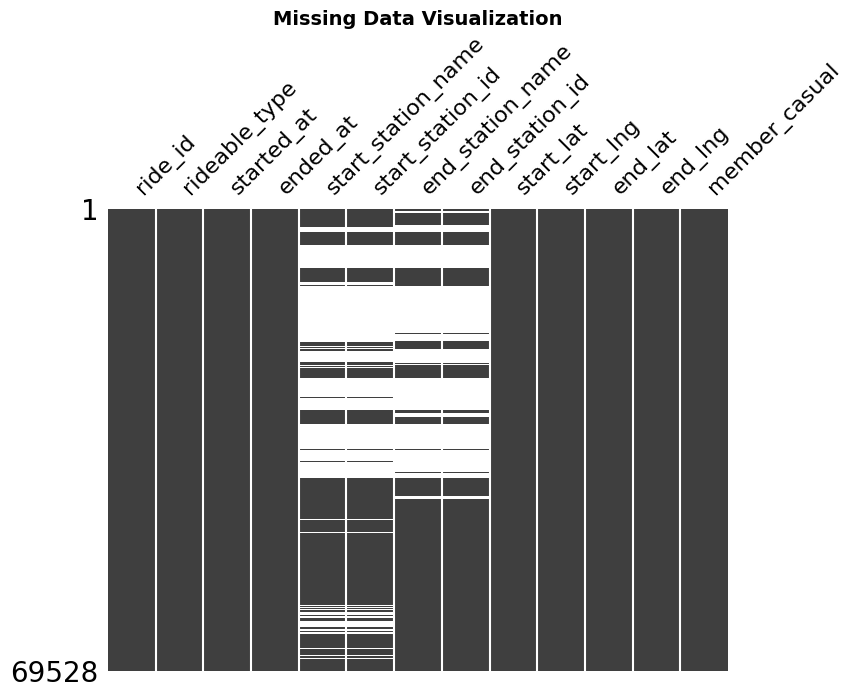

In [28]:
fig, ax = plt.subplots(figsize=(8, 6))
msno.matrix(df_combined, ax=ax, sparkline=False) 
ax.set_title("Missing Data Visualization", fontsize=14, fontweight='bold')
plt.show()


### Handling Duplicates:
No duplicates were found in the dataset.

In [31]:
# Check duplicates 
df_combined[df_combined.duplicated()]

Empty DataFrame
Columns: [ride_id, rideable_type, started_at, ended_at, start_station_name, start_station_id, end_station_name, end_station_id, start_lat, start_lng, end_lat, end_lng, member_casual]
Index: []

In [33]:
# There is no duplates

### Feature Engineering:
To better understand the underlying patterns in the data, I created and manipulated several calculated columns. For example, I converted the date and time data into a proper datetime format, created new columns for the ride duration, month and day of the week, and added a column to calculate the distance covered per ride, among others.

In [36]:
# Copy dataframe for further EDA
df = df_combined.copy()
df.shape

(69528, 13)

In [38]:
# Define timetamp for conversion
def fix_timestamp(ts):
    if pd.isna(ts):
        return ts
    if isinstance(ts, pd.Timestamp):
        return ts  # already converted
    if isinstance(ts, str):
        ts = re.sub(r'(\.\d{2})\d+', r'\1', ts)  # Trim to 2 digits of microseconds
        return pd.to_datetime(ts, errors='coerce')
    return pd.to_datetime(ts, errors='coerce')  # fallback



In [40]:
# Convert all values in timestamp
df['started_at'] = df['started_at'].apply(fix_timestamp)
df['ended_at'] = df['ended_at'].apply(fix_timestamp)

# Subtract to get ride duration
df['ride_length_min'] = ((df['ended_at'] - df['started_at']).dt.total_seconds() / 60).round(2)

# Rearrange columns: get list of column names
cols = list(df.columns)

# Find index of 'ended_at'
end_index = cols.index('ended_at')

# Move 'ride_duration_minutes' right after 'ended_at'
cols.insert(end_index + 1, cols.pop(cols.index('ride_length_min')))

# Apply new column order
df = df[cols]

In [41]:
# Insert a column for days
df['day_of_week'] = df['started_at'].dt.day_name()
cols = list(df.columns)
end_index = cols.index('ride_length_min')
cols.insert(end_index + 1, cols.pop(cols.index('day_of_week')))
df = df[cols]


In [42]:
# Insert a column for months
df['month'] = df['started_at'].dt.month_name()
cols = list(df.columns)
end_index = cols.index('day_of_week')
cols.insert(end_index + 1, cols.pop(cols.index('month')))
df = df[cols]

In [43]:
# Calculate Ride Distance in KM
# Define Haversine function for vectorized operation
def haversine_np(start_lat, start_lng, end_lat, end_lng):
    R = 6371  # Earth radius in kilometers

    lat1_rad = np.radians(start_lat)
    lat2_rad = np.radians(end_lat)
    delta_lat = np.radians(end_lat - start_lat)
    delta_lon = np.radians(end_lng - start_lng)

    a = np.sin(delta_lat / 2) ** 2 + \
        np.cos(lat1_rad) * np.cos(lat2_rad) * \
        np.sin(delta_lon / 2) ** 2

    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))

    return (R * c).round(2)  # in kilometers

# Calculate distance
df['ride_distance_km'] = haversine_np(df['start_lat'], df['start_lng'], df['end_lat'], df['end_lng'])

df.head()

ride_id  rideable_type          started_at            ended_at  \
0  7D9F0CE9EC2A1297   classic_bike 2024-05-25 15:52:42 2024-05-25 16:11:50   
1  02EC47687411416F   classic_bike 2024-05-14 15:11:51 2024-05-14 15:22:00   
2  101370FB2D3402BE   classic_bike 2024-05-30 17:46:04 2024-05-30 18:09:16   
3  E97E396331ED6913  electric_bike 2024-05-17 20:21:54 2024-05-17 20:40:32   
4  674EDE311C543165   classic_bike 2024-05-22 18:52:20 2024-05-22 18:59:04   

   ride_length_min day_of_week month           start_station_name  \
0            19.13    Saturday   May      Streeter Dr & Grand Ave   
1            10.15     Tuesday   May  Sheridan Rd & Greenleaf Ave   
2            23.20    Thursday   May      Streeter Dr & Grand Ave   
3            18.63      Friday   May      Streeter Dr & Grand Ave   
4             6.73   Wednesday   May    Larrabee St & Division St   

  start_station_id                end_station_name end_station_id  start_lat  \
0            13022               Clark St & Elm St   TA1307000039  41.892278   
1     KA1504000159        Sheridan Rd & Loyola Ave         RP-009  42.010587   
2            13022             Wabash Ave & 9th St   TA1309000010  41.892278   
3            13022  Sheffield Ave & Wellington Ave   TA1307000052  41.892270   
4     KA1504000079               Clark St & Elm St   TA1307000039  41.903486   

   start_lng    end_lat    end_lng member_casual  ride_distance_km  
0 -87.612043  41.902973 -87.631280        casual              1.99  
1 -87.662412  42.001044 -87.661198        casual              1.07  
2 -87.612043  41.870769 -87.625734        member              2.65  
3 -87.611946  41.936253 -87.652662        member              5.94  
4 -87.643353  41.902973 -87.631280        casual              1.00

### Distribution of Ride Type:
The distribution of ride types reflects the popularity of different user categories. Member rides are significantly more frequent than casual rides—specifically, there are approximately 17% more rides taken by members.
However, when analyzing total time spent, both member and casual riders contribute almost equally, suggesting that casual riders tend to spend more time per ride, while member riders take shorter but more frequent trips, covering more distance overall.
In conclusion, the membership program appears to be well-established and popular in the area, with a clear preference for membership over casual usage.

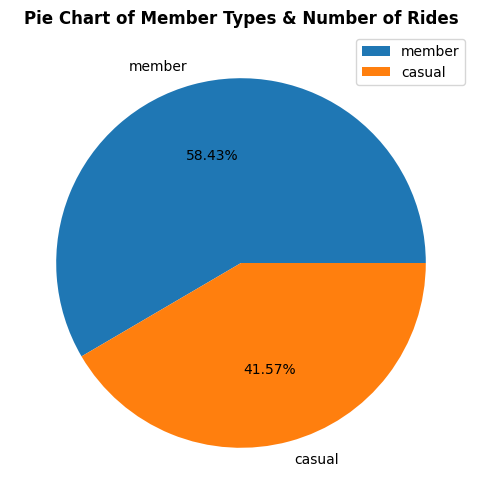

In [45]:
# Create a pie chart of member tyes and number of rides
df_no_of_rides = df['member_casual'].value_counts().reset_index(name = 'no_of_rides')

df_no_of_rides.plot(kind = 'pie',
        y = 'no_of_rides',
        autopct = '%1.2f%%',
        labels = df_no_of_rides['member_casual'],
        figsize = (8, 6)
       )
plt.title('Pie Chart of Member Types & Number of Rides', size = 12, fontweight = 'bold')
plt.ylabel('')
plt.show()    

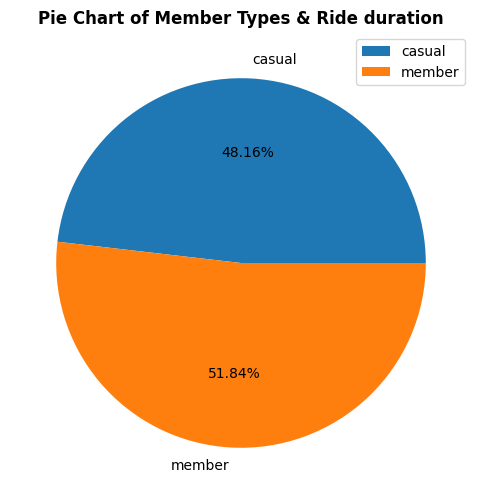

In [46]:
# Create a pie chart of member tyes and ride duration
df_ride_length_min = df.groupby('member_casual')['ride_length_min'].sum().reset_index()

df_ride_length_min.plot(kind = 'pie',
        y = 'ride_length_min',
        autopct = '%1.2f%%',
        labels = df_ride_length_min['member_casual'],
        figsize = (8, 6),
       )
plt.title('Pie Chart of Member Types & Ride duration', size = 12, fontweight = 'bold')
plt.ylabel('')
plt.show()  

In [47]:
# Calculation of average ride duration
df.groupby('member_casual')['ride_length_min'].mean().reset_index()

member_casual  ride_length_min
0        casual        14.690390
1        member        11.248457

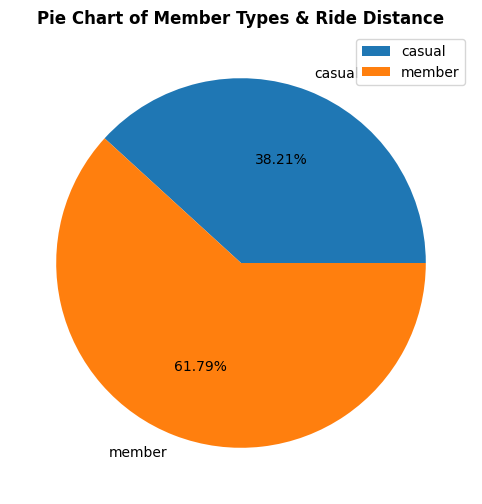

In [48]:
# Create a pie chart of member tyes and ride duration
df_ride_length_min = df.groupby('member_casual')['ride_distance_km'].sum().reset_index()

df_ride_length_min.plot(kind = 'pie',
        y = 'ride_distance_km',
        autopct = '%1.2f%%',
        labels = df_ride_length_min['member_casual'],
        figsize = (8, 6),
       )
plt.title('Pie Chart of Member Types & Ride Distance', size = 12, fontweight = 'bold')
plt.ylabel('')
plt.show()  

In [49]:
# Calculation of average ride distance
df.groupby('member_casual')['ride_distance_km'].mean().reset_index()

member_casual  ride_distance_km
0        casual          1.773120
1        member          2.039583

### Distribution of Rideable Type:
The distribution of rideable types reflects users' preferences for different bike types. The visualization below shows that electric bikes are significantly more popular among both member and casual riders. Classic bikes follow as the second most preferred option, while electric scooters have the lowest demand among both user types. In fact, members are less likely to use electric scooters compared to casual riders.
Interestingly, casual riders tend to ride classic bikes for longer duration on average. However, when comparing all rideable types, the overall distance traveled is relatively consistent across different bike types.

In [51]:
# Create stacked table of member types and ride types
df_stacked = df.groupby(['member_casual', 'rideable_type']).size().unstack().reset_index()

# Convert values to percentage for better comparision
# Make a Copy of stacked data frame
data_percent = df_stacked.copy()

# Select only the numeric columns
cols = ['classic_bike', 'electric_bike', 'electric_scooter']

# Convert to percentages row-wise
data_percent[cols] = data_percent[cols].div(data_percent[cols].sum(axis=1), axis=0) * 100

# Round for better readability
data_percent[cols] = data_percent[cols].round(2)

#Set member_casual as index 
data_percent.set_index('member_casual', inplace = True)

data_percent

rideable_type  classic_bike  electric_bike  electric_scooter
member_casual                                               
casual                16.29          74.95              8.75
member                38.36          60.32              1.33

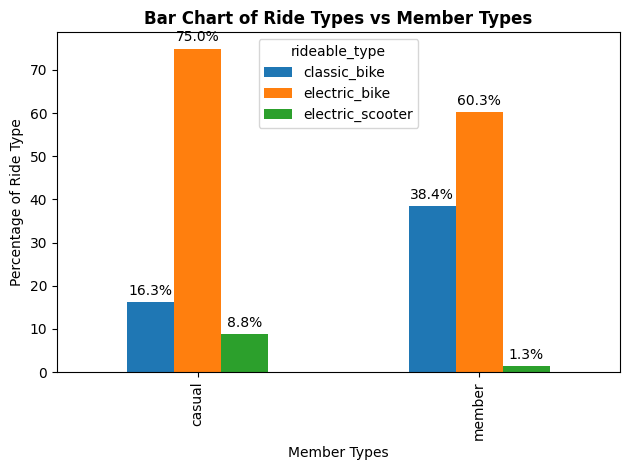

In [52]:
ax = data_percent.plot(kind = 'bar',
                  #stacked = True,
                 )
# Add percentage labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
ax.set_title('Bar Chart of Ride Types vs Member Types', size = 12, fontweight = 'bold')
ax.set_xlabel('Member Types')
ax.set_ylabel('Percentage of Ride Type')
#ax.set_xticks(rotation = 0)
plt.tight_layout()
plt.show()

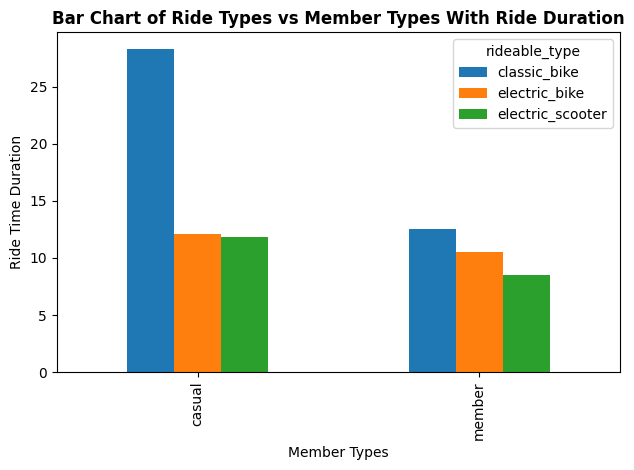

In [53]:
# Crate the group barchart of average ride duration and member types
df_stacked_duration = df.groupby(['member_casual', 'rideable_type'])['ride_length_min'].mean().round(2).unstack().reset_index()
#Set member_casual as index 
df_stacked_duration.set_index('member_casual', inplace = True)

ax = df_stacked_duration.plot(kind = 'bar',
                  #stacked = True,
                 )
# Add percentage labels on top of each bar

ax.set_title('Bar Chart of Ride Types vs Member Types With Ride Duration', size = 12, fontweight = 'bold')
ax.set_xlabel('Member Types')
ax.set_ylabel('Ride Time Duration')
#ax.set_xticks(rotation = 0)
plt.tight_layout()
plt.show()

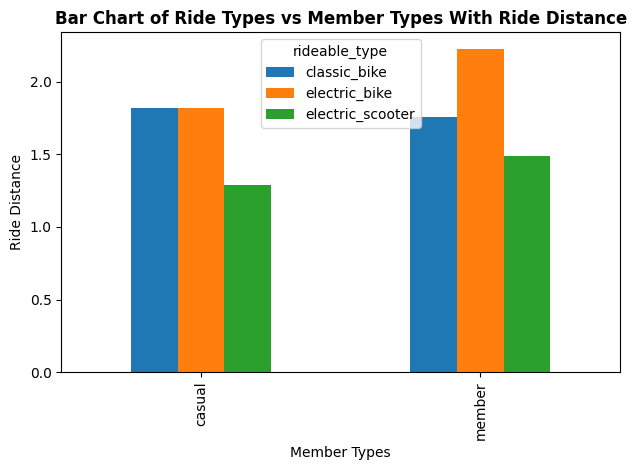

In [54]:
# Crate the group barchart of average ride distance and member types
df_stacked_distance = df.groupby(['member_casual', 'rideable_type'])['ride_distance_km'].mean().round(2).unstack().reset_index()
#Set member_casual as index 
df_stacked_distance.set_index('member_casual', inplace = True)

ax = df_stacked_distance.plot(kind = 'bar',
                  #stacked = True,
                 )
# Add percentage labels on top of each bar

ax.set_title('Bar Chart of Ride Types vs Member Types With Ride Distance', size = 12, fontweight = 'bold')
ax.set_xlabel('Member Types')
ax.set_ylabel('Ride Distance')
#ax.set_xticks(rotation = 0)
plt.tight_layout()
plt.show()

### Day of the Week Distribution:
The distribution of rides across the days of the week reflects user behavior and riding patterns. 
Casual riders generally prefer to ride on weekends, whereas member riders tend to ride more frequently on weekdays.
Interestingly, during weekends, the number of rides by casual and member riders is nearly equal, indicating higher casual usage specifically on those days.

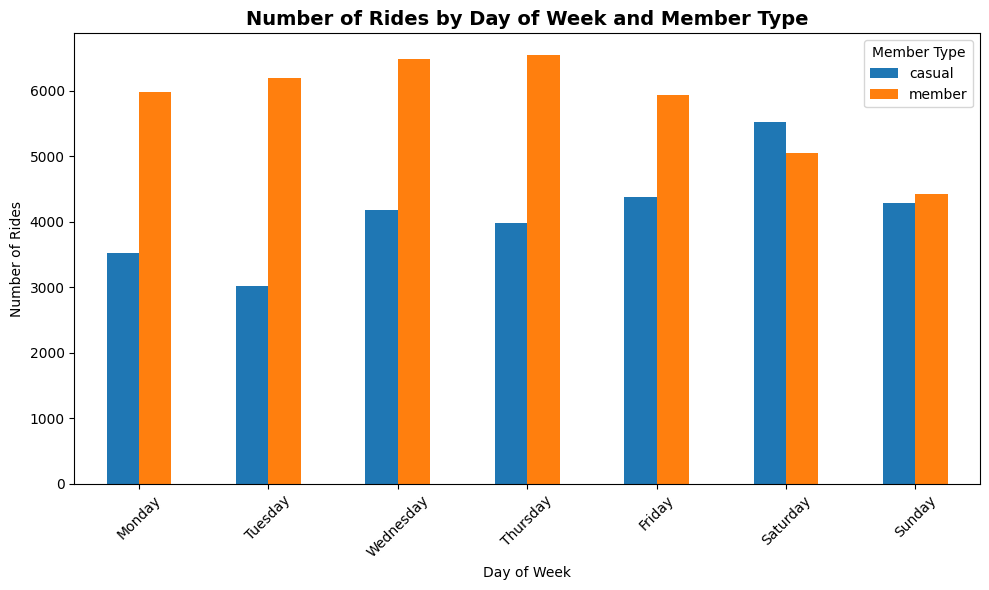

In [56]:
# Creat the stacked bar cahrt of mamber tyes and day of week
# Define the correct order of days
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert 'day_of_week' to a categorical type with the defined order
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories = day_order, ordered=True)

df_day_of_week = pd.crosstab(df['day_of_week'], df['member_casual'])

ax = df_day_of_week.plot(kind='bar',
                         figsize=(10,6),
                         rot=45    # rotate x-labels for readability
)

# 4) Polish it
ax.set_title('Number of Rides by Day of Week and Member Type', fontsize=14, fontweight='bold')
ax.set_xlabel('Day of Week')
ax.set_ylabel('Number of Rides')
ax.legend(title='Member Type')
plt.tight_layout()
plt.show()

### Monthly Ride Distribution:
The monthly ride distribution presents the number of rides taken each month by user type. Member riders show a noticeable drop in rides during June and July, while casual riders significantly prefer riding during these months.
Overall, the riding pattern of member riders is more consistent throughout the year, whereas casual riders exhibit more seasonal variation in their riding behavior.

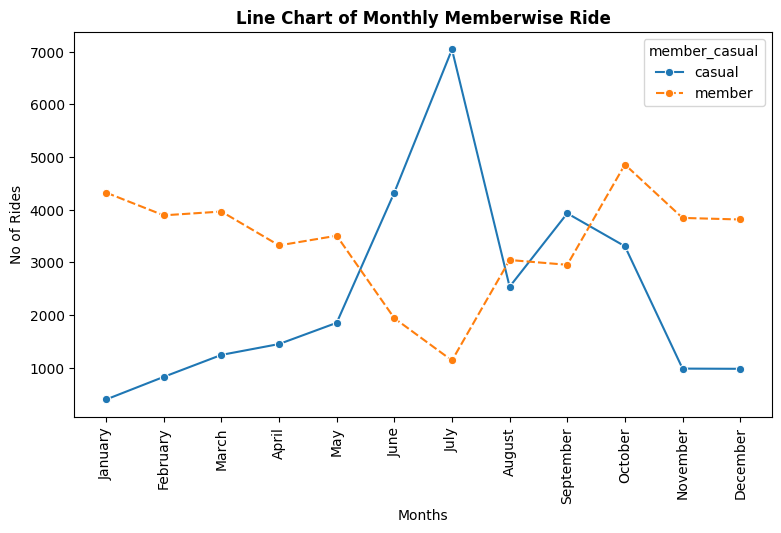

In [58]:
# Create the linechart of montly rides by memeber type

# Define the correct month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert 'month' column to categorical with the correct order
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)

# Create the pivot table
df_pivot = pd.pivot_table(df, index='month', columns='member_casual', values='ride_id', aggfunc='count')

# Plotting
plt.figure(figsize=(9, 5))
sns.lineplot(data=df_pivot, marker='o')
plt.title('Line Chart of Monthly Memberwise Ride', size=12, fontweight='bold')
plt.xlabel('Months')
plt.ylabel('No of Rides')
plt.xticks(rotation=90)
plt.show()
             

### Start Station Distribution: 
The start station distribution highlights the start stations most preferred by riders. Among member riders, "Ewils Ave & 60th" is the most popular start station, followed by "Clinton St & Lake Station" and "Kingsbury St & Kinzie Station".
For casual riders, "Streeter Dr & Grand Ave" is the most frequently used start station, followed by "DuSable Lake Shore Dr & Monroe Station" and "Millennium Park Station".

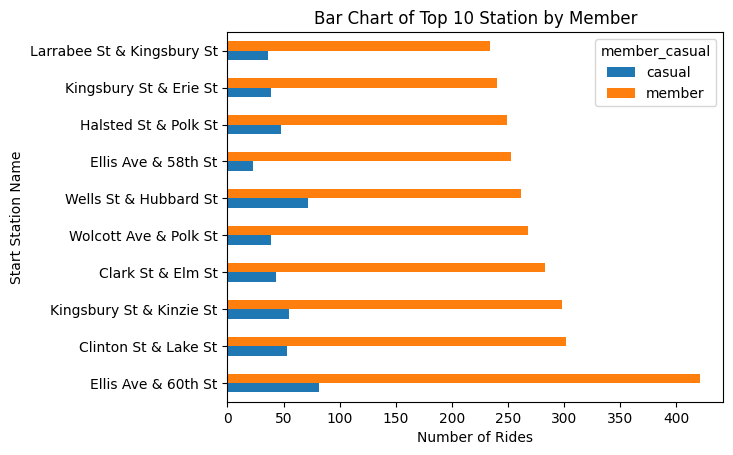

In [60]:
# Create the barchart with top 10 start stations by member
df_top_10_member = pd.crosstab(df['start_station_name'],df['member_casual']).sort_values(by = 'member', ascending = False).head(10)
ax = df_top_10_member.plot(kind = 'barh')
plt.title('Bar Chart of Top 10 Station by Member')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.show()

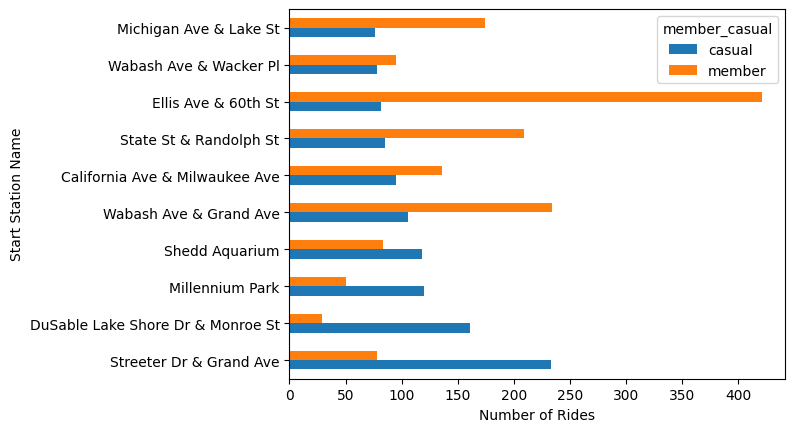

In [61]:
# Create the barchart with top 10 start stations by casual
df_top_10_casual = pd.crosstab(df['start_station_name'],df['member_casual']).sort_values(by = 'casual', ascending = False).head(10)
df_top_10_casual.plot(kind = 'barh')
plt.xlabel('Number of Rides')
plt.ylabel('Start Station Name')
plt.show()

### End Station Distribution: 
The end station distribution represents the preferred destinations where riders end their trips. Among member riders, "Franklin St & Jackson Blvd" is the most popular end station, followed by "Canal St & Jackson Blvd" and "Franklin St & Monroe St".
For casual riders, "Canal St & Jackson Blvd" is the top end station, followed by "Franklin St & Jackson Blvd" and "Albany Ave & Bloomingdale Ave".

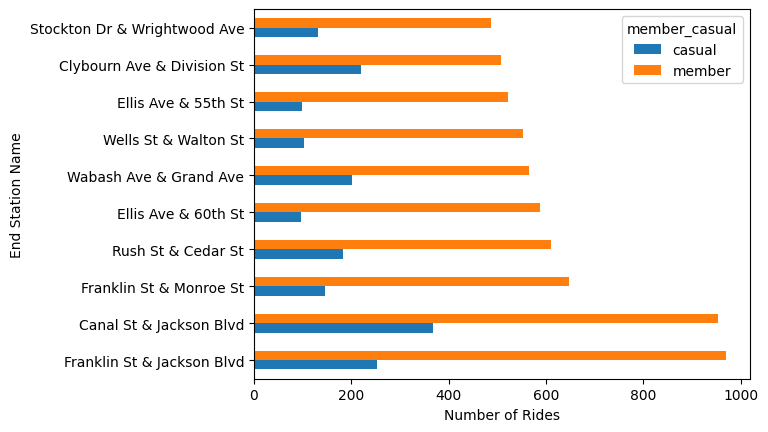

In [63]:
# Create the barchart with top 10 end stations by member
df_top_10_member = pd.crosstab(df['end_station_name'],df['member_casual']).sort_values(by = 'member', ascending = False).head(10)
ax = df_top_10_member.plot(kind = 'barh')
plt.xlabel('Number of Rides')
plt.ylabel('End Station Name')
plt.show()

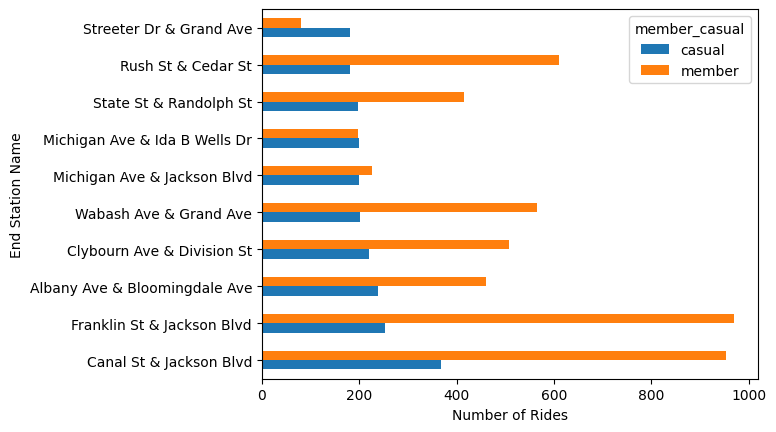

In [64]:
# Create the barchart with top 10 end stations by casual
df_top_10_casual = pd.crosstab(df['end_station_name'],df['member_casual']).sort_values(by = 'casual', ascending = False).head(10)
df_top_10_casual.plot(kind = 'barh')
plt.xlabel('Number of Rides')
plt.ylabel('End Station Name')
plt.show()

### Rider's Density Distribution on Map:
The rider density distribution is visualized using a bubble scatter map in Mapbox, where the size of each bubble represents the frequency of riders at a particular station. Riders are categorized by type, with blue bubbles representing member riders and red bubbles representing casual riders.
The map reveals that most stations are concentrated in specific areas, and rider density is similarly clustered, indicating high-activity zones. Casual riders are heavily concentrated in the central areas of Chicago, particularly in downtown and tourist-friendly zones, whereas member riders are more dispersed across a wider range of locations, suggesting broader, possibly commute-based usage patterns.

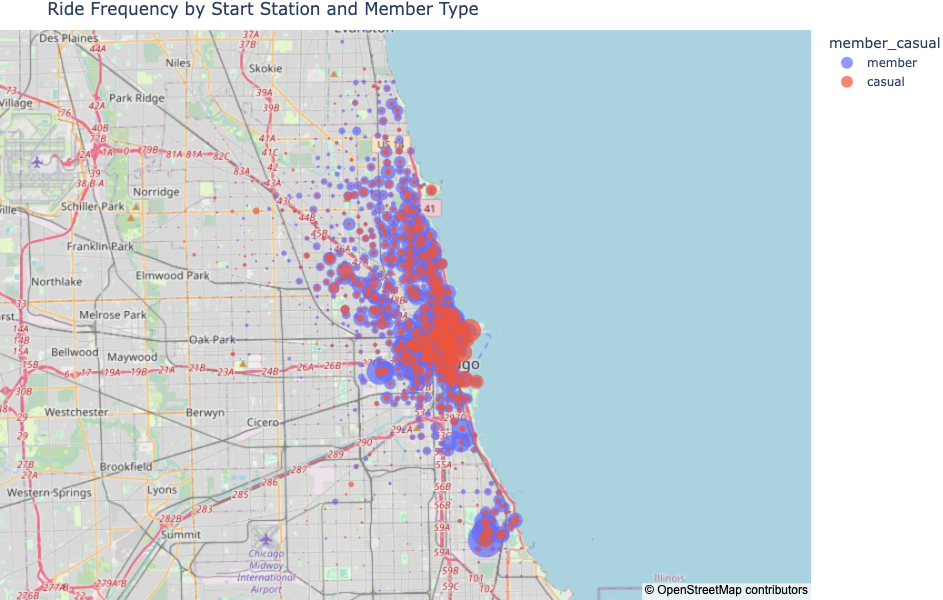

In [66]:
# Create ride counts by start station, including coordinates and rider type
station_member_counts = (df.groupby(['start_station_name', 'start_lat', 'start_lng', 'member_casual']).size().reset_index(name='count'))

# Create the bubble map:
#    - size='count' makes bubble area proportional to ride frequency
#    - color='member_casual' gives different hues for members vs casual riders
fig = px.scatter_mapbox(station_member_counts,
                        lat='start_lat',               
                        lon='start_lng',        
                        size='count',               
                        color='member_casual',       
                        size_max=25,                 
                        hover_name='start_station_name',    
                        hover_data=['member_casual', 'count'],
                        zoom=10,                      
                        height=600,                 
                        mapbox_style="open-street-map"
                       )

# Add a title and tighten layout margins
fig.update_layout(
    title="Ride Frequency by Start Station and Member Type",  
    margin={"r":0, "t":30, "l":0, "b":0}  # remove extra padding
)

fig.show()


Note: The interactive map might not display correctly when converting the notebook to HTML.



### Major Findings:
* Approximately 17% more rides taken by members than caluals.
* Casual riders tend to spend more time per ride, while member riders take shorter but more frequent trips, covering more distance overall.
* Casual riders tend to ride classic bikes for longer duration on average.
* Casual riders generally prefer to ride on weekends, whereas member riders tend to ride more frequently on weekday.
* Member riders show a noticeable drop in rides during summer, while casual riders significantly prefer riding during summer season.
* For casual riders, "Streeter Dr & Grand Ave" is the most frequently used start station, followed by "DuSable Lake Shore Dr & Monroe Station" and "Millennium Park Station".
* For casual riders, "Canal St & Jackson Blvd" is the top end station, followed by "Franklin St & Jackson Blvd" and "Albany Ave & Bloomingdale Ave".
* Casual riders are heavily concentrated in the central areas of Chicago, particularly in downtown and tourist-friendly zones.

### Conclustion and Recommendations:
__Usage Patterns:__ How do annual members and casual riders differ in their bike-sharing behavior?
The majority of riders prefer the annual membership, with more than half of the current users being annual members. This indicates that riders find value in subscribing and renewing their membership. Member riders tend to take shorter trips but cover more distance during weekdays, suggesting they primarily use the bikes for daily commuting or work-related travel. On the other hand, casual riders generally ride classic bikes for longer durations and prefer to ride during the summer season, indicating that classic bikes are mostly used by tourists or leisure riders.

__Membership Incentives:__ What would motivate casual riders to convert to annual subscriptions?
Annual members take bikes frequently for short trips, which provides convenience and likely saves them both time and money. Additionally, promoting the environmental benefits of cycling could attract environmentally conscious riders, making sustainability a key message and positioning in marketing campaigns. Since member ridership decreases in summer while casual ridership increases, Cyclistic could offer an all-year package to reduce seasonality effects. Moreover, given the high demand in central Chicago, customized membership packages tailored to those high-traffic areas could boost conversions.

__Digital Engagement:__ How can Cyclistic leverage digital marketing and online channels to persuade casual riders to become members?
Summer is an ideal time to target casual riders with marketing campaigns due to increased casual usage during this season. Location-based marketing can also be highly effective; Cyclistic should focus digital campaigns around high-demand stations frequented by casual riders, such as Streeter Dr & Grand Ave, DuSable Lake Shore Dr & Monroe Station, Millennium Park Station, Canal St & Jackson Blvd, Franklin St & Jackson Blvd, and Albany Ave & Bloomingdale Ave. Since casual riders are heavily concentrated in central Chicago’s downtown and tourist areas, targeted advertising and promotions in these locations can help convert casual users into annual members.